Computational modeling in python, SoSe2022

# Numerical integration of functions (1)

Given are the following functions:

\begin{align}
    f_1(x) &= x\left(x-3\right)\left(x+3\right) \\
    f_2(x) &= \left| x \right| \\
    f_3(x) &= \sin \left(2.1x\right)\left(-\frac{x}{2}\right) \\
    f_4(x) &= 1.6^x -1.5x \\
    f_5(x,y) &= \sin\left(x+y\right)\tan\left(0.1x\right) \\
    f_6(x,y) &= \sin\left(\sqrt{5}+x\right)y 
\end{align}

\- courtesy of Anna Bardroff \- 

In [1]:
from numpy import *
import matplotlib.pyplot as plt

def function1(x):
    y = x*(x - 3)*(x + 3)
    return y

def function2(x):
    y = abs(x)
    return y

def function3(x):
    y = sin(x * 2.1) * (-x / 2.0)
    return y

def function4(x):
    y = 1.6 ** x - 1.5 * x
    return y

def function5(x,y):
    z = sin(x + y) * tan(0.1 * x)
    return z

def function6(x,y):
    z = sin(sqrt(5) + x) * y
    return z

#################################################################


def integral1(a,b):
    # integral of function1 over [a,b]
    return (b**4/4 - 9*b**2/2) - (a**4/4 - 9*a**2/2)

def integral2(a,b):
    # integral of function2 over [a,b]
    a2 = a**2/2*sign(a)
    b2 = b**2/2*sign(b)
    return b2 - a2

def integral3(a,b):
    # integral of function3 over [a,b]
    uv = -cos(b*2.1)/2.1 * (-b / 2.0) + cos(a*2.1)/2.1 * (-a / 2.0)
    uvp = -sin(b*2.1)/2.1**2 /2 + sin(a*2.1)/2.1**2 /2 
    return uv + uvp

def integral4(a,b):
    # integral of function4 over [a,b]
    lg = 1.6**b/log(1.6) - 1.6**a/log(1.6)
    sq = 1.5 * b**2/2 - 1.5 * a**2/2
    return lg - sq


Numerical integration is the integration of a function $f$:

\begin{align}
I = \int_a^b f(x) dx
\end{align}

The goal is to obtain $I$ as accurately as possible with as few evaluations of the function as possible. We will discuss several strategies to achieve this goal during the lecture. But first lat us look at some direct approaches.

We start with the geometrical interpretation of the integral as the oriented area between the graph of the function and the $x$-axis. Oriented here means that the area is counted positive in $x$-domains where the function is positive and negative in domains where the function is negative. 


## The direct approach: The Riemann sum

Within the Riemann approach the interval $[a,b]$ is partitioned into $n$ non-overlapping sub-intervals of length $\Delta x_j$ and $x_j$ is an arbitrary point inside the interval. Note that the length of the sub-interval is in general not fixed but could be chosen arbitrarily, for instance longer when the function is almost constant or very short when the function varies strongly. 


Integration by summation through the Riemann sum is then based on the Rieman-Integral:
\begin{align}
I = \int_a^b f(x) dx = \lim_{n \rightarrow\infty} \sum_j^n f(x_j) \cdot \Delta x_j
\end{align}

For numerical integration we cannot go to infinitely many intervals but have to chose a finite set. 
\begin{align}
I = \int_a^b f(x) dx \approx \sum_j^n f(x_j) \cdot \Delta x_j
\end{align}

We choose the lower and upper bounds as $a=-4$ and $b=4$. For simplicity we chose fixed $\Delta x$ (equidistant points) and $x_j$ will be the leftmost point of the sub-interval:

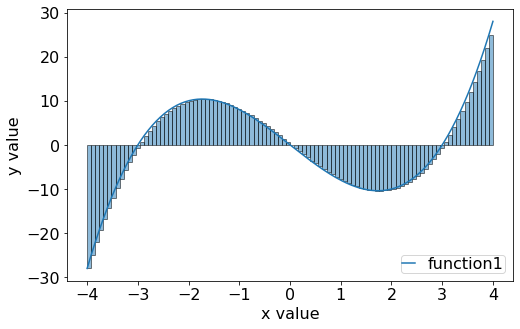

In [7]:
a=-4
b=4
npoints = 100

x,dx = linspace(a,b,npoints,endpoint=False,retstep=True)
f1 = function1(x)

#just for plotting
xfine = linspace(a,b,npoints*2,endpoint=True,retstep=False)
f1fine = function1(xfine)

mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(xfine,f1fine,label='function1')

ax.bar(x,f1,width=dx,align='edge',edgecolor='black',alpha=0.5)

plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
legend = ax.legend(loc='lower right', shadow=False,fontsize=mf,borderpad = 0.1,
                   labelspacing = 0, handlelength = 0.8)
plt.show()

In [8]:
def integrate_Riemann(func,a,b,npoints):
    x, dx = linspace(a,b,npoints,retstep = True, endpoint=False) # exclude last point
    ff = func(x)
    I = ff.sum()*dx
    return I

#check this for a known function
#note that we include the last rectangle in a simple approximation 
a=0
b=pi/2
npoints = 100
int1=integrate_Riemann(sin,a,b,npoints)
print('The Riemann integral of the test function is {}.'.format(int1))
print('Analytical solution is 1,')
print("Integration Error is {}.".format(1-int1) )

The Riemann integral of the test function is 0.9921254566056329.
Analytical solution is 1,
Integration Error is 0.007874543394367106.


In [13]:
%%time
a=-4
b=4
npoints = 100

int1=integrate_Riemann(function1,a,b,npoints)
ex1 = integral1(a,b)
print('The Riemann integral of function1 is {}.'.format(int1))
print('The error of the Riemann integral is {}.\n'.format(int1-ex1))

int2=integrate_Riemann(function2,a,b,npoints)
ex2 = integral2(a,b)

print('The Riemann integral of function2 is {}.'.format(int2))
print('The error of the Riemann integral is {}.\n'.format(int2-ex2))

int3=integrate_Riemann(function3,a,b,npoints)
ex3 = integral3(a,b)
print('The Riemann integral of function3 is {}.'.format(int3))
print('The error of the Riemann integral is {}.\n'.format(int3-ex3))


int4=integrate_Riemann(function4,a,b,npoints)
ex4 = integral4(a,b)
print('The Riemann integral of function4 is {}.'.format(int4))
print('The error of the Riemann integral is {}.\n'.format(int4-ex4))


The Riemann integral of function1 is -2.239999999999997.
The error of the Riemann integral is -2.239999999999997.

The Riemann integral of function2 is 16.0.
The error of the Riemann integral is 0.0.

The Riemann integral of function3 is -1.1810367681696985.
The error of the Riemann integral is 0.0018710782403783544.

The Riemann integral of function4 is 13.844633547651538.
The error of the Riemann integral is 0.2255640105771537.

CPU times: user 243 µs, sys: 3.79 ms, total: 4.03 ms
Wall time: 2.67 ms


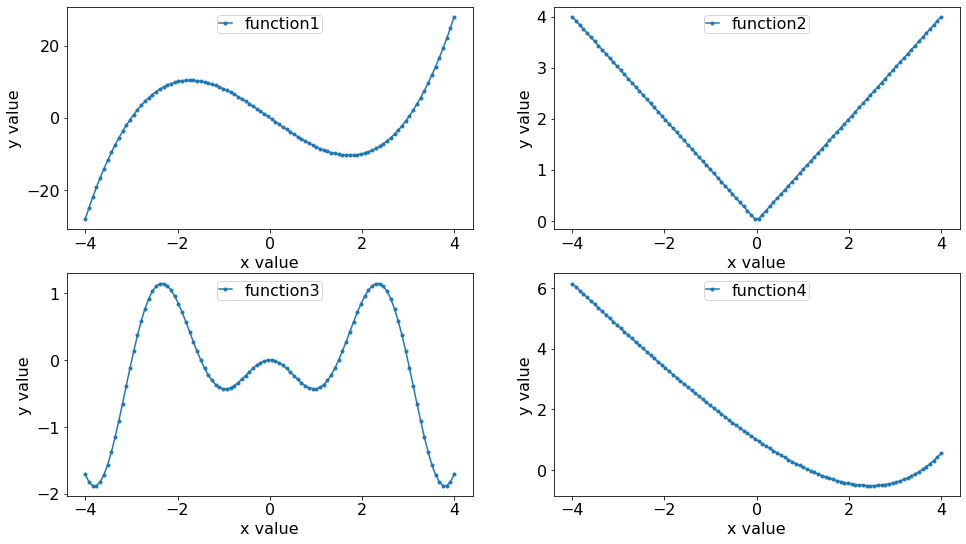

In [14]:
x = linspace(a,b,npoints)
f1 = function1(x)
f2 = function2(x)
f3 = function3(x)
f4 = function4(x)

mf=16
fig, ax = plt.subplots(2,2,figsize=(16,9))
ax[0,0].plot(x,f1,marker='.',label='function1')
ax[0,1].plot(x,f2,marker='.',label='function2')
ax[1,0].plot(x,f3,marker='.',label='function3')
ax[1,1].plot(x,f4,marker='.',label='function4')

for i in range(2):
    for j in range(2):
        ax[i,j].xaxis.set_tick_params(labelsize=mf)
        ax[i,j].yaxis.set_tick_params(labelsize=mf)
        ax[i,j].set_xlabel('x value',fontsize=mf)
        ax[i,j].set_ylabel('y value',fontsize=mf)
    
        legend = ax[i,j].legend(loc='upper center', shadow=False,fontsize=mf,borderpad = 0.1, 
                          labelspacing = 0, handlelength = 0.8)
plt.show()

## Trapezoidal rule

In this approach, the function $f(x)$ is first interpolated between two known points, and the interpolating functions are then integrated. As interpolating functions, polynomials (usually of first second order) are used.

In the simplest approach, the interpolating function is simply a constant (a polynomial of degree zero) - this is the midpoint rule, and the integral is represented through rectangles or boxes with height equal to the midpoint between $x_j$ and $x_{j+1}$.

In the trapeziodal rule, a linear function (polynomial of degree one) is used to connect the two neighboring points, and the integral is represented through trapezoids. Using one trapezoid to represent the integral between $a$ and $b$, this reads (trapeziodal rule)
\begin{align}
\int_a^b f(x) dx \approx (b-a) \frac{f(a)+f(b)}{2} = \frac{\Delta x}{2} \left(f(a)+f(b)\right)
\end{align}
This would only give a rather crude approximation of the integral, and to improve the accuracy, the interval between $a$ and $b$ is divided into a number of subintervals $n-1$. This leads to the extended trapezoidal rule

\begin{align}
\int_a^b f(x) dx \approx \frac{\Delta x}{2} \left( \sum_{j=1}^{n} f(x_j) + f(x_{j-1}) \right)
\end{align}

For subintervals of equal length, this is a Newton-Cotes formula, and equivalent to Simpson's rule at lower order (Simpson's rule: evaluate a number of additional equidistant points, typically 1 or 2, in the interval, interpolate with a polynomial, typically quaddratic or qubic, and integrate analytically).

The formula can be rewritten as a sum of two Riemann integrals, one using the rightmost point, one using the leftmost point of the sub-interval:
\begin{align}
\int_a^b f(x) dx \approx \frac{1}{2} \left( \sum_{j=1}^{n} f(x_j) \Delta x + \sum_{j=1}^{n} f(x_{j-1}) \Delta x \right)
\end{align}

The advantage of this approach is that previously evaluated points can be reused and iterated with increasing $n$ until a specified degree of accuracy is achieved.

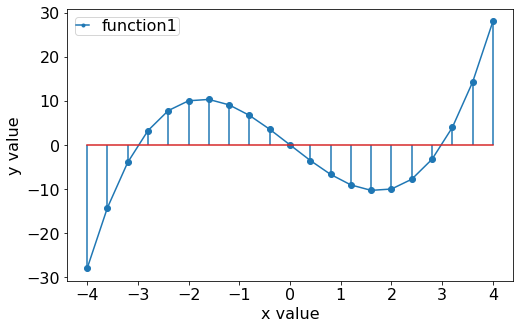

In [15]:
a=-4
b=4
npoints = 21
num,dx = linspace(a,b,npoints,retstep=True)
f1 = function1(num)

mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(num,f1,marker='.',label='function1')
ax.stem(num,f1,use_line_collection=True)

plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
legend = ax.legend(loc='best', shadow=False,fontsize=mf,borderpad = 0.1, 
                   labelspacing = 0, handlelength = 0.8)
plt.show()

In [16]:
def integrate_Trapezoid(func,a,b,npoints):
    x,dx = linspace(a,b,npoints,retstep=True,endpoint=True)
    y = func(x)                 # func evaluated on all points
    if npoints == 1:
        I = (b-a)/0.5*(x[0]+x[-1])
    else:
       
        I = (y[1:npoints-1].sum() + (y[0] + y[-1])/2)*dx
        
    return I

#check this for a known function
a=0
b=pi/2
n=100
int1=integrate_Trapezoid(sin,a,b,n)
print('The trapezoid integral of test function is {}.'.format(int1))
print('Analytical solution is 1,')
print("Integration Error is {}.".format(1-int1) )

The trapezoid integral of test function is 0.9999790207508321.
Analytical solution is 1,
Integration Error is 2.0979249167885072e-05.


In [17]:
%%time
a=-4
b=4
npoints=10000
int1=integrate_Trapezoid(function1,a,b,npoints)
ex1 = integral1(a,b)
print('The extended trapezoidal rule gives the integral {} for function1.'.format(int1))
print('The error of the extended trapezoidal rule integral is {}.\n'.format(int1-ex1))


int2=integrate_Trapezoid(function2,a,b,npoints)
ex2 = integral2(a,b)
print('The extended trapezoidal rule gives the integral {} for function2.'.format(int2))
print('The error of the extended trapezoidal rule integral is {}.\n'.format(int2-ex2))

int3=integrate_Trapezoid(function3,a,b,npoints)
ex3 = integral3(a,b)
print('The extended trapezoidal rule gives the integral {} for function3.'.format(int3))
print('The error of the extended trapezoidal rule integral is {}.\n'.format(int3-ex3))

int4=integrate_Trapezoid(function4,a,b,npoints)
ex4 = integral4(a,b)
print('The extended trapezoidal rule gives the integral {} for function4.'.format(int4))
print('The error of the extended trapezoidal rule integral is {}.\n'.format(int4-ex4))

The extended trapezoidal rule gives the integral 1.0187359395796376e-14 for function1.
The error of the extended trapezoidal rule integral is 1.0187359395796376e-14.

The extended trapezoidal rule gives the integral 16.000000160032005 for function2.
The error of the extended trapezoidal rule integral is 1.6003200542513696e-07.

The extended trapezoidal rule gives the integral -1.1829076593099461 for function3.
The error of the extended trapezoidal rule integral is 1.8710013072187337e-07.

The extended trapezoidal rule gives the integral 13.619069697559755 for function4.
The error of the extended trapezoidal rule integral is 1.6048537077040237e-07.

CPU times: user 8.37 ms, sys: 294 µs, total: 8.67 ms
Wall time: 5.81 ms


In [18]:
#Of course, there already is a numpy routine for this
npoints = 100
x2=linspace(0,pi/2,npoints)
ff = sin(x2)
int1=trapz(ff,x2)
print('The extended trapezoidal rule gives the integral {} for test function.'.format(int1))

The extended trapezoidal rule gives the integral 0.9999790207508321 for test function.


In [19]:
%%time

x = linspace(a,b,npoints)
f1 = function1(x)
f2 = function2(x)
f3 = function3(x)
f4 = function4(x)
int1=trapz(f1,x)
int2=trapz(f2,x)
int3=trapz(f3,x)
int4=trapz(f4,x)
print('The extended trapezoidal rule gives the integral {} for function1.'.format(int1))
print('The extended trapezoidal rule gives the integral {} for function2.'.format(int2))
print('The extended trapezoidal rule gives the integral {} for function3.'.format(int3))
print('The extended trapezoidal rule gives the integral {} for function4.'.format(int4))

The extended trapezoidal rule gives the integral -4.440892098500626e-16 for function1.
The extended trapezoidal rule gives the integral 16.001632486480972 for function2.
The extended trapezoidal rule gives the integral -1.1809987683558578 for function3.
The extended trapezoidal rule gives the integral 13.620706608990066 for function4.
CPU times: user 1.96 ms, sys: 134 µs, total: 2.09 ms
Wall time: 1.58 ms


__It may seem that the trapezoidal rule generally gives more precise results than the Riemann method. Let us change change the evaluation point of the Riemann method to the middle of the interval:__

In [20]:
def integrate_Riemann_midpoint(func,a,b,npoints):
    x, dx = linspace(a,b,npoints,retstep = True, endpoint=False) # exclude last point
    ff = func(x+dx/2)
    I = ff.sum()*dx
    return I

#check this for a known function
#note that we include the last rectangle in a simple approximation 
a=0
b=pi/2
npoints = 100
int1=integrate_Riemann_midpoint(sin,a,b,npoints)
print('The Riemann integral of the test function is {}.'.format(int1))
print('Analytical solution is 1,')
print("Integration Error is {}.".format(1-int1) )

The Riemann integral of the test function is 1.0000102809119054.
Analytical solution is 1,
Integration Error is -1.0280911905358181e-05.


In [21]:
%%time
a=-4
b=4
npoints = 10000

int1=integrate_Riemann_midpoint(function1,a,b,npoints)
ex1 = integral1(a,b)
print('The Riemann midpoint integral of function1 is {}.'.format(int1))
print('The error of the Riemann midpoint integral is {}.\n'.format(int1-ex1))

int2=integrate_Riemann_midpoint(function2,a,b,npoints)
ex2 = integral2(a,b)

print('The Riemann midpoint integral of function2 is {}.'.format(int2))
print('The error of the Riemann midpoint integral is {}.\n'.format(int2-ex2))

int3=integrate_Riemann_midpoint(function3,a,b,npoints)
ex3 = integral3(a,b)
print('The Riemann midpoint integral of function3 is {}.'.format(int3))
print('The error of the Riemann midpoint integral is {}.\n'.format(int3-ex3))


int4=integrate_Riemann_midpoint(function4,a,b,npoints)
ex4 = integral4(a,b)
print('The Riemann midpoint integral of function4 is {}.'.format(int4))
print('The error of the Riemann midpoint integral is {}.\n'.format(int4-ex4))

The Riemann midpoint integral of function1 is 7.275957614183426e-15.
The error of the Riemann midpoint integral is 7.275957614183426e-15.

The Riemann midpoint integral of function2 is 16.0.
The error of the Riemann midpoint integral is 0.0.

The Riemann midpoint integral of function3 is -1.1829079399414357.
The error of the Riemann midpoint integral is -9.353135888012787e-08.

The Riemann midpoint integral of function4 is 13.619069456847749.
The error of the Riemann midpoint integral is -8.02266360011572e-08.

CPU times: user 2.01 ms, sys: 7.94 ms, total: 9.95 ms
Wall time: 6.55 ms


__The Riemann midpoint rule can be interpreted as midpoint trapezoidal rule where the tangent at the midpoint is used to form the trapezoid.__

For an overview of the available functions, take a look at 
https://docs.scipy.org/doc/scipy/tutorial/integrate.html

The numpy reference can be found here https://numpy.org/doc/stable/reference/routines.math.html#sums-products-differences


### Multidimensional integrals

Numerical approaches to multidimensional integrals are computationally expensive (for example, approximations as repeated one-dimensional integrals require repeated function evaluations which grow exponentially with the number of dimensions $D$: If one uses $N$ points for each dimension, the number 
of function evaluations grows as $N^D$, this is known as __the curse of dimensionality__).

A Riemann-like extension to N-D integrals would read like:

\begin{align}
I = \int_{a_1}^{b_1}\int_{a_2}^{b_2}\cdots  \int_{a_N}^{b_N} f(x_1,x_2,\cdots,x_N) dx_1 dx_2\cdots,dx_N \approx \sum_{i_1} \sum_{i_2} \cdots   \sum_{i_N}  f(x_{i_1},x_{i_2},\cdots,x_{i_N}) \Delta x_1 \Delta x_2\cdots,\Delta x_N
\end{align}



A method that overcomes the curse of dimensionality is Monte Carlo integration. Monte Carlo methods rely on repeated evaluations using random sampling. Thus, in Monte Carlo integration, the sampling grid is chosen randomly. Instead of having $D$ nested loops over $N$ points of independent variables, one only has one big loop:

The multidimensional integral
\begin{align}
I = \int_{a_x}^{b_x}\int_{a_y}^{b_y} f(x,y) dx dy = \int \int f dV
\end{align}
in the Volume $V$ can be approximated as
\begin{align}
\int \int f dV \approx V \langle f \rangle \pm V \sqrt{\frac{\langle f^2 \rangle-\langle f \rangle^2}{N}}
\end{align}
Leaving aside the error term:
\begin{align}
\int \int f dV \approx \frac{V}{N} \sum_i f(x_i) = \sum_i f(x_i) \langle dV\rangle
\end{align}

(<span  style="color:darkred">Attention: Error term assumes Gaussian distributed function values, should be seen as a rough estimate</span>)
for the $N$  uniformly distributed sampling points and the estimate of the standard deviation is defined through the mean denoted by $\langle \rangle$ as
\begin{align}
f_i & = f(x_i) \\
\langle f \rangle   &=  \frac{1}{N} \sum_i^N f_i  \\
\langle f \rangle^2 &= \left( \frac{1}{N} \sum_i^N f_i \right)^2 \\
\langle f^2 \rangle &= \frac{1}{N} \sum_i^N f_i^2 \\
\end{align}


(Side remark: there are more advanced methods that use non-uniform sampling, not discussed here)

A Monte Carlo integration consists of several steps: Random number generation, function evaluation, summation. 


We discuss two approaches, a direct one called __sampling method__ using equations above directly and evaluating the function on random $x$ values (see below). Alternatively, the

## Hit-and-miss approach

We extend the sampled space by one additional coordinate, the function values, and then any any point that lies between the function and the zero-plane is counted as $\pm 1$, depending on the function value. 

\begin{align}
y=f(x) & \longrightarrow \tilde{f}(x,y) 
\end{align}
with
\begin{align}
\tilde{f}(x,y) = \begin{cases}
+1\,\, {\rm for} \,\, y <= f(x)\,\, {\rm and} \,\,y>0 & \,\, \,\, {\rm (hit: counts +1)}\\
-1\,\, {\rm for} \,\, y >= f(x)\,\, {\rm and} \,\,y<0 & \,\, \,\, {\rm (hit: counts -1)}\\
0\,\,  {\rm else}& \,\, \,\, {\rm (miss)}
\end{cases}
\end{align}

Now one can integrate over $\tilde{f}(x,y)$ using two random variables, $x_i$ and $y_i$  Advantage of the latter: 
* works also if the function is given implicitly, for instance unit circle: $x^2 + y^2 = 1$ (hit: inside circle, miss: outside circle)
* especially suitable for extimating the volume of high-dimensional objects, for instance an N-sphere. 

Disadvantage: 
* One needs to know the function ranges which may be difficult to know in advance. 
* one may have large numbers of sampling points that do not contribute directly (many misses)


### What does $\tilde{f}(x,y)$ look like?

In [ ]:
N = 100
a = -4
b = 4

x = linspace(a, b, N)

fval = function1(x)
fmax = fval.max()
fmin = fval.min()

y = linspace(fmin, fmax, N)

X, Y = meshgrid(x, y, indexing="ij")



def ftilde(func,X,Y):
    fvals = func(X)
    
    result = ((Y <= fvals) & (Y >= 0)).astype(int)
    result = result - ((Y >= fvals) & (Y < 0)).astype(int)
    return result
    
ftilde(function1,X,Y)

In [ ]:
from matplotlib import cm  # color map

mf = 16

fig = plt.figure(figsize=(10,8))

# This creates an axes object. Since we 
# we want to do a 3D plot we add the
# named argument "projection='3d'"
ax = plt.axes(projection='3d')

# cm: color map 
ax.plot_surface(X, Y, ftilde(function1,X,Y), cmap = cm.viridis, rstride=1, cstride=1, edgecolor='None')

plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)

# z axis fontsize is a bit cumbersome
for t in ax.zaxis.get_major_ticks(): 
    t.label.set_fontsize(mf)

ax.set_xlabel('x value',fontsize=mf,labelpad=20)
ax.set_ylabel('y value',fontsize=mf,labelpad=20)
ax.set_zlabel('z value',fontsize=mf,labelpad=20)

plt.show()

In [ ]:
%%time
N = 1000
a = -4
b = 4

# we need to determine the sampling volume, which lies between a and b,
# and the minimum and maximum value of the function we want to integrate
# trying an educated guess of the fmax and fmin values based on 
# preliminary evaluations of the function
# this may be tricky for real world problems
# Here we can just scan the function on a linspace 
xval = linspace(a, b, N)
yval = function1(xval)

fmax = yval.max()
fmin = yval.min()


# now the sampling points are generated
x_rand = (b-a)*random.random(N)+a
y_rand = (fmax-fmin)*random.random(N)+fmin

# The i'th random point in 2D will be
# (x,y) = x_rand[i],y_rand[i]


# check if the point that is sampled lies within the integration area - this returns the index
# where the condition evaluates to true because false is interpreted as zero
# this is a numpy function and works only for variables of type array
# positive sampled values
# here using the & operator: nonzero actually gets an array 
# of type 'bool', the & operator compares element wise the arrays
# we pass to it. 
# nonzero then returns all indices where the elements of the
# resulting bool array that are "True", taking "True" as 1
# and "False" as 0. 

# evaluate the function on the random x-points
function1_rand = function1(x_rand)

ind_below_pos = nonzero((y_rand <= function1_rand) & (y_rand >= 0)) #hit +1 (green points)
ind_below_neg = nonzero((y_rand >= function1_rand) & (y_rand < 0))  #hit -1 (red points)

#we only need the points outside the integration volume to see how 
#good the selected volume is - should be as few as possible
ind_above_pos = nonzero((y_rand > function1_rand) & (y_rand >= 0)) # miss (blue points)
ind_above_neg = nonzero((y_rand < function1_rand) & (y_rand < 0))  # miss (blue points)

#we visualize the sampling points to understand how this works
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_rand[ind_below_pos], y_rand[ind_below_pos], color = "green",label='hit, counts +1')
ax.scatter(x_rand[ind_below_neg], y_rand[ind_below_neg], color = "red",  label='hit, counts -1')
ax.scatter(x_rand[ind_above_pos], y_rand[ind_above_pos], color = "blue",label='miss, counts  0')
ax.scatter(x_rand[ind_above_neg], y_rand[ind_above_neg], color = "blue")

ax.plot(xval, yval, color = "red",label='function')
plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
ax.text(-3.8,28,'Area A',fontsize=mf)
legend = ax.legend( shadow=False,fontsize=mf, borderpad = 0.1, 
                    labelspacing = 0, handlelength = 0.8,ncol=1, 
                    bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# returns the positions where the array above is True (false is interpreted as 0, True as 1)
# (returns a tuble of arrays, one for each dimension)
nonzero((y_rand <= function1_rand) & (y_rand >= 0))

Note that the sampling volume for a 1D integral corresponds to a rectangle. The Monte Carlo integral is now the area $A$ multiplied with the fraction of points that fall below the curve (the integral of the function). In other words, a volume is chosen over which to sample, that contains the volume that should be integrated over. The points in this selected volume that fall below the curve are set to 1 or -1 depending if the function value is positive or negative, and the points that lie above (that lie outside of the integration volume) are set to zero.

This immediately makes it clear that the sampling volume should contain the integration volume as closely as possible: If many sampled points lie outside the integration volume, the effective sampling rate is much lower than the number of samples, directly increasing the numerical error.

Generally, Monte Carlo integration requires many functional evaluations to produce accurate integrals, with the accuracy only increasing as $\sqrt{N}$ for $N$ sampled points.

In [ ]:

npos = len(ind_below_pos[0]) # number of green points
nneg = len(ind_below_neg[0]) # number of red points

nmiss = len(ind_above_pos[0])+len(ind_above_neg[0])

#now we can compute the above integral
print('Number of pts above the curve (misses)= outside of integration volume (blue):', 
      nmiss,"\n")

print('Number of pts below the curve (hits)= inside of integration volume (red + green):',
      npos + nneg,"\n")

print('Number of pts below the curve that evaluate to positive values (hits +1)\n',
      '= inside of integration volume, (green) count positive (+1):',
      npos,"\n" )

print('Number of pts below the curve that evaluate to negative values (hits -1)\n', 
      '= inside of integration volume, but need to be subtracted (-1):',
      nneg, '\n')


print('Ratio of sampled points within integration are vs total samples is',
      (npos + nneg)/N,"\n" )

print('Total sample (rectangle) area (V):', (fmax-fmin)*(b-a),"\n")

print('Monte Carlo integral:', (fmax-fmin)*(b-a)*(npos-nneg)/N)

meanfsquare = ((npos - nneg)/N)**2
fsquaremean = (npos + nneg)/N  # f^2 is one for all points that count, zero otherwise
  
error =  (fmax-fmin)*(b-a)*sqrt((fsquaremean - meanfsquare)/N)
print('Estimated Monte-Carlo error:', error,"\n")
print('Exact integral:', integral1(a,b),"\n")


Compare this to the results above. Let's see how this works with many more points:

In [ ]:
def integrate_MC1D(N,func,a,b):
    
    # this one usually cannot do
    # for high-dimensional integrals
    xval = linspace(a, b, N)
    yval = func(xval)
    fmax = yval.max()
    fmin = yval.min()
    
    
    # just to avoid zero volume
    if abs(fmax-fmin) < 1.e-8:
        fmin = fmin - 1.e-8
        fmax = fmax + 1.e-8
    
    x_rand = (b-a)*random.random(N)+a
    y_rand = (fmax-fmin)*random.random(N)+fmin
    
    # evaluate this only once
    func_rand = func(x_rand)
    
    
    ind_below_pos = nonzero((y_rand <= func_rand) & (y_rand >= 0))
    ind_below_neg = nonzero((y_rand >= func_rand) & (y_rand < 0))
    ind_above_pos = nonzero((y_rand > func_rand) & (y_rand >= 0))
    ind_above_neg = nonzero((y_rand < func_rand) & (y_rand < 0))
    
    mf=16
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(x_rand[ind_below_pos], y_rand[ind_below_pos], color = "green",label='hit,counts +1')
    ax.scatter(x_rand[ind_below_neg], y_rand[ind_below_neg], color = "red",label='hit, counts -1')
    ax.scatter(x_rand[ind_above_pos], y_rand[ind_above_pos], color = "blue",label='miss, counts 0')
    ax.scatter(x_rand[ind_above_neg], y_rand[ind_above_neg], color = "blue")
    ax.plot(xval, yval, color = "red",label='f')
    plt.xticks(fontsize=mf)
    plt.yticks(fontsize=mf)
    ax.set_xlabel('x value',fontsize=mf)
    ax.set_ylabel('y value',fontsize=mf)
    legend = ax.legend( shadow=False,fontsize=mf, borderpad = 0.1, 
                       labelspacing = 0, handlelength = 0.8,ncol=1, 
                       bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    # print some statistics
    
    outside=len(ind_above_pos[0])+len(ind_above_neg[0])
    print('Number of pts above the curve (outside of integration area):',outside)
    
    ins=len(ind_below_pos[0])+len(ind_below_neg[0])
    print('Number of pts below the curve (within integration area):', ins)
    
    sampled = ins/N
    integral = (len(ind_below_pos[0])-len(ind_below_neg[0]))/N
    print('Ratio of sampled points within integration are vs total sample are', sampled)
    
    area = (fmax-fmin)*(b-a)
    print('Total sample (rectangle) area:', area)
    print('Monte Carlo integral:', area*integral)
    
    # error estimate
    # number of positive and negative points:
    npos = len(ind_above_pos[0])
    nneg = len(ind_below_neg[0])
    
    meanfsquare = ((npos - nneg)/N)**2
    fsquaremean = (npos + nneg)/N  # f^2 is one for all points that count, zero otherwise
    
    error = area*sqrt((fsquaremean - meanfsquare)/N)
    print('Estimated Monte-Carlo error:', error)
    
    

#check this for a known function
N=20000
a=0
b=pi/2
int0=integrate_MC1D(N,sin,a,b)

In [ ]:
N=20000
a = -4
b = 4

int1 = integrate_MC1D(N,function1,a,b)
#note how the value changes for same parameters but repeated evaluation of the cell, and how much it fluctuates

In [ ]:
N=20000
a = -4
b = 4
int1 = integrate_MC1D(N,function2,a,b)

In [ ]:
N=20000
a = -4
b = 4

int1 = integrate_MC1D(N,function3,a,b)

In [ ]:
N=20000
a = -4
b = 4

int1 = integrate_MC1D(N,function4,a,b)

## Sampling approach

Only sample the independent variables and evaluate the function there. 

Advantages:
* More like a black-box (no function ranges need to be known in advance)
* All points contribute. 

Disadvantages:
* Does not work on implicitely given functions (like volumes if N-D objects). 

In [ ]:
def integrate_MC1D_direct(N,myfunc,a,b):
    
    x_rand = (b-a)*random.random(N)+a
    y_rand = myfunc(x_rand)
    
    mf=16
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(x_rand, y_rand, color = "green",label='f(x)')
    plt.xticks(fontsize=mf)
    plt.yticks(fontsize=mf)
    ax.set_xlabel('x value',fontsize=mf)
    ax.set_ylabel('y value',fontsize=mf)
    legend = ax.legend(loc='lower right', shadow=False,fontsize=mf,borderpad = 0.1, labelspacing = 0, handlelength = 0.8,ncol=4)
    plt.show()
    
    integral = sum(y_rand)*(b-a)/N
    print('Monte Carlo integral:', integral)
    
    # error estimate:

    error = sqrt(((y_rand**2).mean() - y_rand.mean()**2)/N)*(b-a)
    print('Estimated Monte-Carlo error:', error)
    
    return integral
    
    
    
    #check this for a known function
N=100
a=0
b=pi/2

int0=integrate_MC1D_direct(N,sin,a,b)

print('Analytical solution is 1,')
print("Real integration Error is {}.".format(1-int0) )

In [ ]:
N=20000
a = -4
b = 4
int1 = integrate_MC1D_direct(N,function1,a,b)

In [ ]:
N=20000
a = -4
b = 4
int1 = integrate_MC1D_direct(N,function2,a,b)

In [ ]:
N=20000
a = -4
b = 4

int1 = integrate_MC1D_direct(N,function3,a,b)

In [ ]:
N=20000
a = -4
b = 4
int1 = integrate_MC1D_direct(N,function4,a,b)

# Task 1
 


Write a class object that contains the different numerical approaches to integration. Compare accuracy and speed of the different approaches. Which approach works well for which function? Which functions are difficult to integrate with a Monte Carlo approach?

Make sure to validate your results using analytical integrals. 

# Task 2

Line out how you would proceed to implement 2D integrals for functions $f_5$ and $f_6$ using a 2D Riemann method (no need to implement, we will do something similar later) and a Monte-Carlo integral. 

Make a statement about the scaling of the number of numerical operations compared to 1D integrals in case of the Riemann method. Does this scaling also apply to the Monte-Carlo method?


# Optional: 
Argue if the structure of functions $f_5$ and $f_6$ can be exploited to implement the Riemann integrals in a more efficient way than one would use for arbitrary 2D functions. Hint: $\sin(x+y) = \sin(x) \cdot \cos(y) + \cos(x) \cdot \sin(y)$


Upload your notebook to moodle.